In [9]:
import pandas as pd
import numpy as np
import spacy
import re
from matplotlib import pyplot as plt

In [10]:
file_name = 'data/merchants_data.csv'


In [11]:
data = pd.read_csv(file_name, sep="?")

In [12]:
data = data[data.apply( lambda x: x[0].lower() in x[1].lower(), axis=1)]


In [13]:
data.shape

(37668, 3)

In [14]:
data[:5]

merchant_string                          raw_trans_string  \
0         Netflix    #NETFLIX.COM           NETFLIX.COM  CA   
1         Netflix    #NETFLIX.COM           NETFLIX.COM  CA   
4      Home Depot  THE HOME DEPOT 2306      FLORENCE     KY   
5      Home Depot  THE HOME DEPOT 2306      FLORENCE     KY   
6           Sears  SEARS ROEBUCK   1730     FLORENCE     KY   

        clean_trans_string  
0  NETFLIX.COM NETFLIX.COM  
1  NETFLIX.COM NETFLIX.COM  
4           THE HOME DEPOT  
5           THE HOME DEPOT  
6            SEARS ROEBUCK

#### Number of items without duplicates

In [15]:
data.drop_duplicates(['raw_trans_string', 'merchant_string']).shape # Duplicates with the 2 columns

(13789, 3)

In [16]:
data.drop_duplicates(['raw_trans_string']).shape # Duplicates with raw_trans_string only

(13331, 3)

### String stats

In [17]:
text_col = 'raw_trans_string'
merchant_str_col = 'merchant_string'

In [18]:
data['merchant_name_len'] = data[merchant_str_col].str.len()

In [19]:
data['raw_trans_string_len'] = data[text_col].str.len()

In [20]:
data['raw_trans_string_nb_numbers'] = data.apply(lambda x: len(re.findall(r'(\d)', x[1])), axis=1)

In [21]:
data['raw_trans_strings_np_non_ascii'] = data.apply(lambda x: len(re.findall(r'([^\w\s\d])', x[1])), axis=1)

In [22]:
data['raw_trans_strings_np_spaces'] = data.apply(lambda x: len(re.findall(r'(\s)', x[1])), axis=1)

In [23]:
data['raw_trans_strings_merchant_name_start'] = data.apply(lambda x: x[1].lower().find(x[0].lower()), axis=1)

In [24]:
data['raw_trans_strings_merchant_name_end'] = data.apply(lambda x: x[1].lower().find(x[0].lower()) + len(x[0]), axis=1)

In [25]:
data.describe()

merchant_name_len  raw_trans_string_len  raw_trans_string_nb_numbers  \
count       37668.000000          37668.000000                 37668.000000   
mean            7.928905             35.380694                     6.293751   
std             3.653995             13.189804                     5.740896   
min             2.000000              3.000000                     0.000000   
25%             5.000000             27.000000                     2.000000   
50%             7.000000             38.000000                     5.000000   
75%            10.000000             40.000000                    10.000000   
max            23.000000            200.000000                    42.000000   

       raw_trans_strings_np_non_ascii  raw_trans_strings_np_spaces  \
count                    37668.000000                 37668.000000   
mean                         1.075183                     7.640092   
std                          1.210075                     5.630468   
min                          0.000000                     0.000000   
25%                          0.000000                     3.000000   
50%                          1.000000                     6.000000   
75%                          2.000000                    12.000000   
max                         17.000000                    30.000000   

       raw_trans_strings_merchant_name_start  \
count                           37668.000000   
mean                                1.230514   
std                                 3.556848   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                95.000000   

       raw_trans_strings_merchant_name_end  
count                         37668.000000  
mean                              9.159419  
std                               4.930498  
min                               2.000000  
25%                               6.000000  
50%                               8.000000  
75%                              11.000000  
max                              97.000000

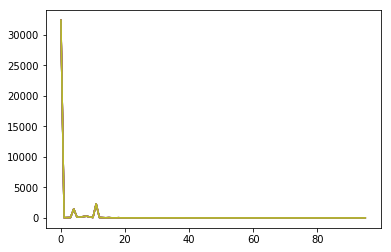

In [26]:
plt.plot(data.groupby('raw_trans_strings_merchant_name_start').agg(['count']))

In [27]:
data.groupby('raw_trans_strings_merchant_name_start').agg(['count'])

merchant_string raw_trans_string  \
                                                count            count   
raw_trans_strings_merchant_name_start                                    
0                                               32382            32382   
1                                                  37               37   
3                                                  67               67   
4                                                1474             1474   
5                                                 147              147   
6                                                 125              125   
7                                                 222              222   
8                                                 279              279   
9                                                 161              161   
10                                                 71               71   
11                                               2318             2318   
12                                                 72               72   
13                                                 47               47   
14                                                 26               26   
15                                                 49               49   
16                                                 18               18   
17                                                 14               14   
18                                                 37               37   
19                                                 10               10   
20                                                 12               12   
21                                                  6                6   
22                                                  3                3   
23                                                  6                6   
24                                                 11               11   
25                                                 11               11   
26                                                  1                1   
27                                                  3                3   
28                                                 15               15   
29                                                  4                4   
31                                                  1                1   
32                                                  1                1   
34                                                 10               10   
35                                                  4                4   
36                                                  9                9   
38                                                 11               11   
39                                                  1                1   
71                                                  1                1   
91                                                  1                1   
95                                                  1                1   

                                      clean_trans_string merchant_name_len  \
                                                   count             count   
raw_trans_strings_merchant_name_start                                        
0                                                  32300             32382   
1                                                     37                37   
3                                                     67                67   
4                                                   1474              1474   
5                                                    147               147   
6                                                    125               125   
7                                                    222               222   
8                                                    279               279   
9                                                    161               

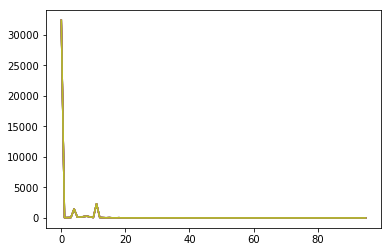

In [20]:
plt.show()

In [21]:
plt.plot(data[data['raw_trans_strings_merchant_name_start'] > 0].groupby('raw_trans_strings_merchant_name_start').agg(['count']))

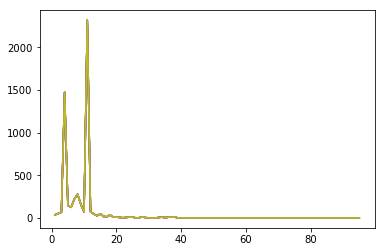

In [22]:
plt.show()

In [23]:
plt.plot(data.groupby('raw_trans_strings_merchant_name_end').agg(['count']))

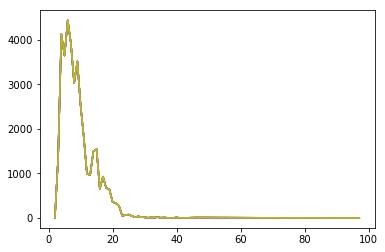

In [24]:
plt.show()

In [41]:
# Number of samples for category clasus
count = data.groupby('raw_trans_strings_merchant_name_start')['merchant_string'].agg(['count'])
np.min(count[count['count'] > 11])

count    12
dtype: int64

### NER Annotations

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
data['NER'] = data.apply( lambda x: [ (w.label_, w.text) for w in nlp(x[1]).ents ], axis=1)

In [ ]:
data[:1000]